In [34]:
#Pre-Processamento

import pandas as pd

df_1 = pd.read_csv('data/panel_extraction/HIST_PAINEL_COVIDBR_2020_Parte1.csv', sep= ';')
df_2 = pd.read_csv('data/panel_extraction/HIST_PAINEL_COVIDBR_2020_Parte2.csv', sep= ';')
df_3 = pd.read_csv('data/panel_extraction/HIST_PAINEL_COVIDBR_2021_Parte1.csv', sep= ';')
df_4 = pd.read_csv('data/panel_extraction/HIST_PAINEL_COVIDBR_2021_Parte2.csv', sep= ';')

df = pd.concat([df_1, df_2, df_3, df_4])
df = df[df['regiao']=='Brasil']
df = df[['data','obitosNovos']]
df['data'] = pd.to_datetime(df["data"])
df.rename(columns={'obitosNovos':'obitos'}, inplace=True)
df.to_csv('data/covid_br_obitos.csv', sep= ';', index=False)

<AxesSubplot:xlabel='data'>

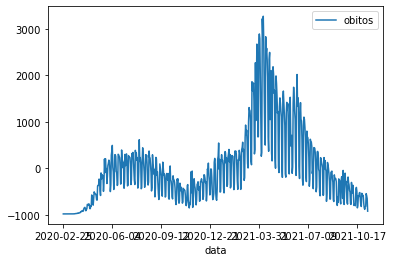

In [83]:
import statsmodels

df = pd.read_csv('data/covid_br_obitos.csv', sep= ';')
df.set_index('data', inplace=True)

x = statsmodels.tsa.tsatools.detrend(x=df, order=0, axis=0)
x.plot()

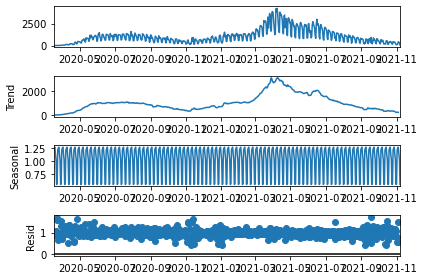

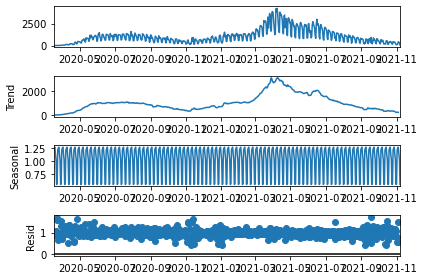

In [3]:
import pandas as pd
import statsmodels.tsa.api as sm

df = pd.read_csv('data/covid_br_obitos.csv', sep= ';')
df = df[df['obitos']>0]
df.set_index('data', inplace=True)
df = df.asfreq(freq='D')
x = sm.seasonal_decompose(x=df, model='multiplicative', period=7 )
x.plot()
